# lesson-7

### Библиотеки:

In [1]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_blobs
import random

### Программа из методички

In [2]:
X_knn, y_knn = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X_knn = X_knn[:, :2]

In [3]:
X_train_knn, X_test_knn, y_train_knn, y_test_knn = model_selection.train_test_split(X_knn, y_knn, test_size=0.2, random_state=1)

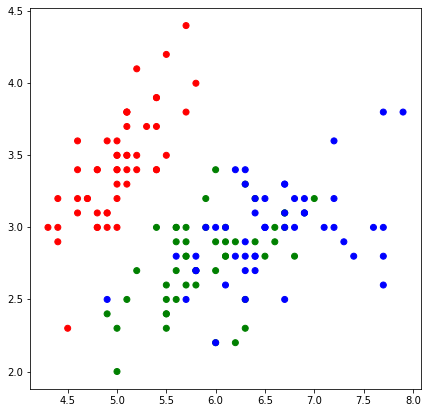

In [4]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X_knn[:, 0], X_knn[:, 1], c=y_knn, cmap=cmap)

In [5]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
      
    return np.sqrt(distance)

In [6]:
def knn(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [7]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [8]:
def get_graph(X_train, y_train, k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

In [9]:
k = 1

y_pred = knn(X_train_knn, y_train_knn, X_test_knn, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test_knn):.3f}')

Точность алгоритма при k = 1: 0.667


<ipython-input-8-a1d024d4c536>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


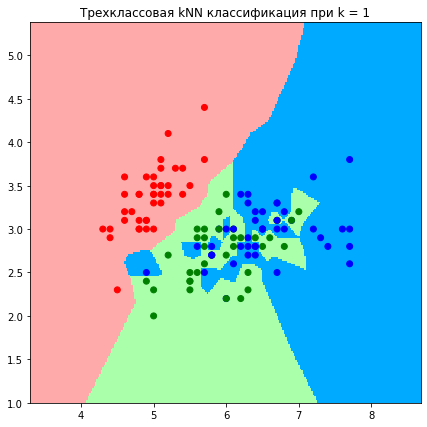

In [10]:
get_graph(X_train_knn, y_train_knn, k)

In [11]:
k = 2

y_pred = knn(X_train_knn, y_train_knn, X_test_knn, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test_knn):.3f}')

Точность алгоритма при k = 2: 0.667


<ipython-input-8-a1d024d4c536>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


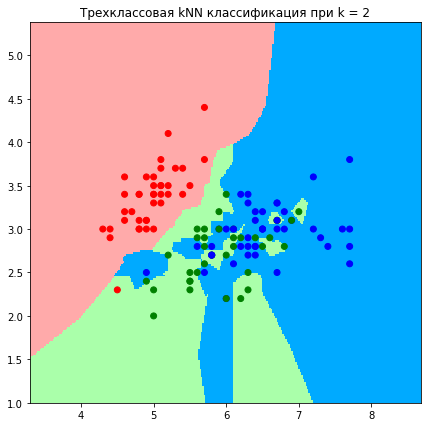

In [12]:
get_graph(X_train_knn, y_train_knn, k)

In [13]:
k = 3

y_pred = knn(X_train_knn, y_train_knn, X_test_knn, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test_knn):.3f}')

Точность алгоритма при k = 3: 0.733


<ipython-input-8-a1d024d4c536>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


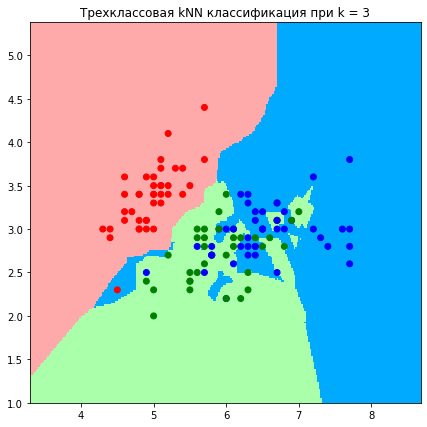

In [14]:
get_graph(X_train_knn, y_train_knn, k)

In [15]:
k = 4

y_pred = knn(X_train_knn, y_train_knn, X_test_knn, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test_knn):.3f}')

Точность алгоритма при k = 4: 0.833


<ipython-input-8-a1d024d4c536>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


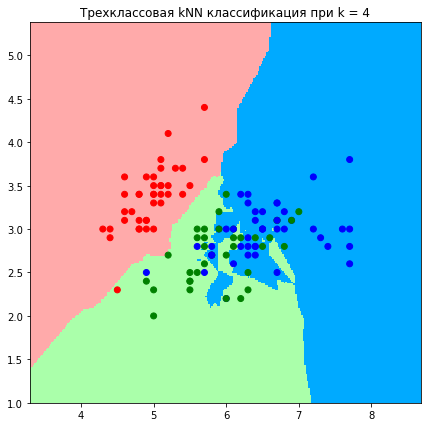

In [16]:
get_graph(X_train_knn, y_train_knn, k)

In [17]:
k = 5

y_pred = knn(X_train_knn, y_train_knn, X_test_knn, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test_knn):.3f}')

Точность алгоритма при k = 5: 0.867


<ipython-input-8-a1d024d4c536>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


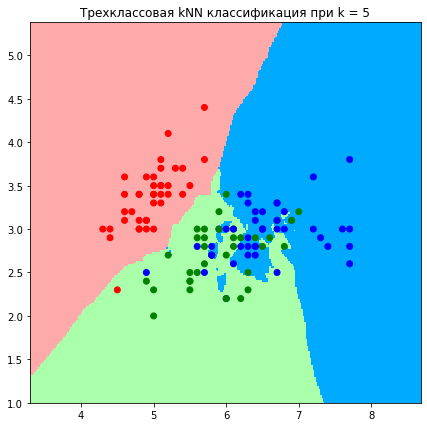

In [18]:
get_graph(X_train_knn, y_train_knn, k)

In [19]:
k = 6

y_pred = knn(X_train_knn, y_train_knn, X_test_knn, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test_knn):.3f}')

Точность алгоритма при k = 6: 0.833


<ipython-input-8-a1d024d4c536>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


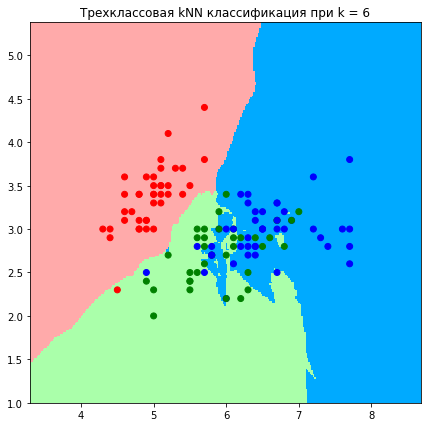

In [20]:
get_graph(X_train_knn, y_train_knn, k)

In [21]:
k = 7

y_pred = knn(X_train_knn, y_train_knn, X_test_knn, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test_knn):.3f}')

Точность алгоритма при k = 7: 0.800


<ipython-input-8-a1d024d4c536>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


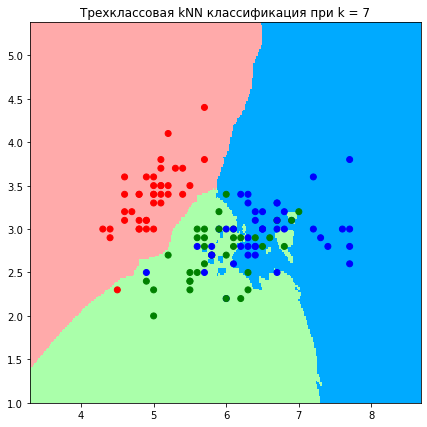

In [22]:
get_graph(X_train_knn, y_train_knn, k)

In [23]:
X_km, y_km = make_blobs(n_samples=100, random_state=1)

In [24]:
def kmeans(data, k, max_iterations, min_distance):
    # Создадим словарь для классификации
    classes = {i: [] for i in range(k)}
    
    # инициализируем центроиды как первые k элементов датасета
    centroids = [data[i] for i in range(k)]
    
    for _ in range(max_iterations):
        # классифицируем объекты по центроидам
        for x in data:
            # определим расстояния от объекта до каждого центроида
            distances = [e_metrics(x, centroid) for centroid in centroids]
            # отнесем объект к кластеру, до центроида которого наименьшее расстояние
            classification = distances.index(min(distances))
            classes[classification].append(x)
        
        # сохраним предыдущие центроиды в отдельный список для последующего сравнения сновыми
        old_centroids = centroids.copy()
        
        # пересчитаем центроиды как среднее по кластерам
        for classification in classes:
            centroids[classification] = np.average(classes[classification], axis=0)
            
        # сравним величину смещения центроидов с минимальной
        optimal = True
        for centroid in range(len(centroids)):
            if np.sum(abs((centroids[centroid] - old_centroids[centroid]) / old_centroids * 100)) > min_distance:
                optimal = False
                
        # если все смещения меньше минимального, останавливаем алгоритм  
        if optimal:
            break
    
    return old_centroids, classes

In [25]:
def visualize(centroids, classes):
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'pink', 'orange', 'purple']
    
    plt.figure(figsize=(7,7))
    
    # нанесем на график центроиды
    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], marker='x', s=130, c='black')
        
    # нанесем объекты раскрашенные по классам
    for class_item in classes:
        for x in classes[class_item]:
            plt.scatter(x[0], x[1], color=colors[class_item])
            
    plt.show()

In [26]:
# определим максимальное количество итераций
max_iterations = 1

# и минимальное расстояние между центроидами до пересчета и после него, при котором нужно остановить алгоритм
min_distance = 1e-4

# сразу определим известное нам количество кластеров
k = 3

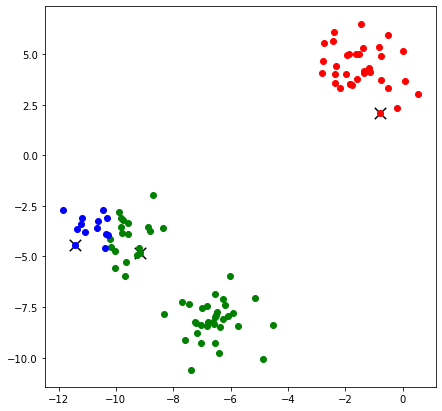

In [27]:
centroids, clusters = kmeans(X_km, k, max_iterations, min_distance)

visualize(centroids, clusters)

### 1. К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей в зависимости от номера соседа.

Перепишем функцию knn:

In [28]:
def knn(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        test_distances = sorted(test_distances)
        
        for j in range(k):
            classes[test_distances[j][1]] += 1/(j + 1)
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [29]:
k = 1

y_pred = knn(X_train_knn, y_train_knn, X_test_knn, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test_knn):.3f}')

Точность алгоритма при k = 1: 0.667


<ipython-input-8-a1d024d4c536>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


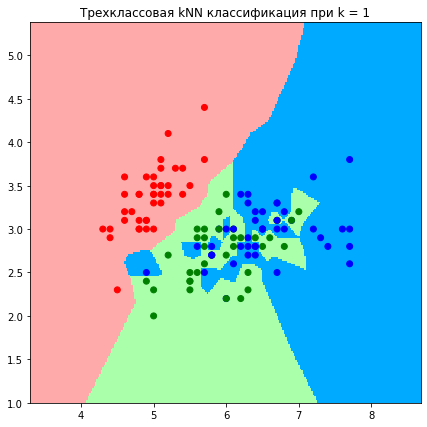

In [30]:
get_graph(X_train_knn, y_train_knn, k)

In [31]:
k = 5

y_pred = knn(X_train_knn, y_train_knn, X_test_knn, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test_knn):.3f}')

Точность алгоритма при k = 5: 0.733


<ipython-input-8-a1d024d4c536>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


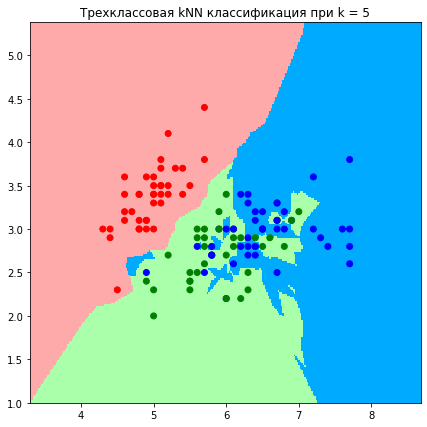

In [32]:
get_graph(X_train_knn, y_train_knn, k)

In [33]:
k = 10

y_pred = knn(X_train_knn, y_train_knn, X_test_knn, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test_knn):.3f}')

Точность алгоритма при k = 10: 0.767


<ipython-input-8-a1d024d4c536>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


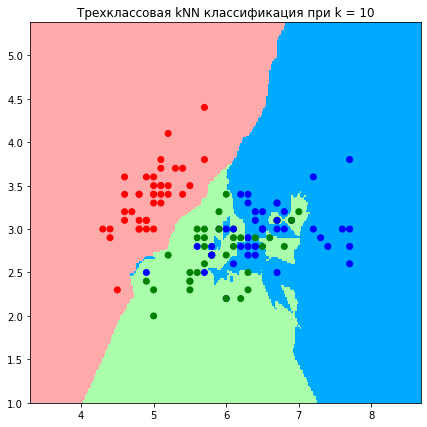

In [34]:
get_graph(X_train_knn, y_train_knn, k)

In [35]:
k = 20

y_pred = knn(X_train_knn, y_train_knn, X_test_knn, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test_knn):.3f}')

Точность алгоритма при k = 20: 0.800


<ipython-input-8-a1d024d4c536>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


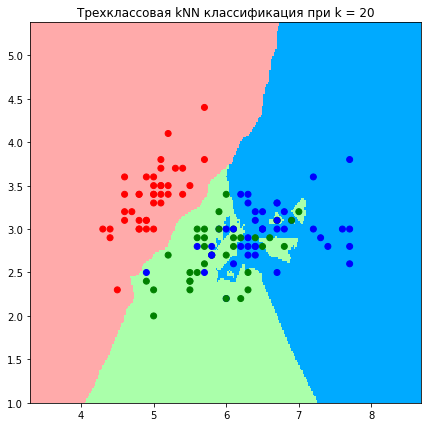

In [36]:
get_graph(X_train_knn, y_train_knn, k)

In [37]:
k = 30

y_pred = knn(X_train_knn, y_train_knn, X_test_knn, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test_knn):.3f}')

Точность алгоритма при k = 30: 0.833


<ipython-input-8-a1d024d4c536>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


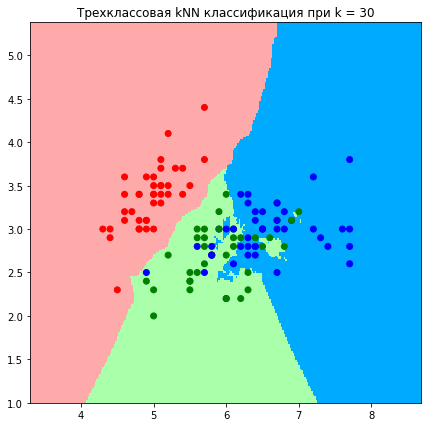

In [38]:
get_graph(X_train_knn, y_train_knn, k)

In [39]:
k = 50

y_pred = knn(X_train_knn, y_train_knn, X_test_knn, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test_knn):.3f}')

Точность алгоритма при k = 50: 0.833


<ipython-input-8-a1d024d4c536>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


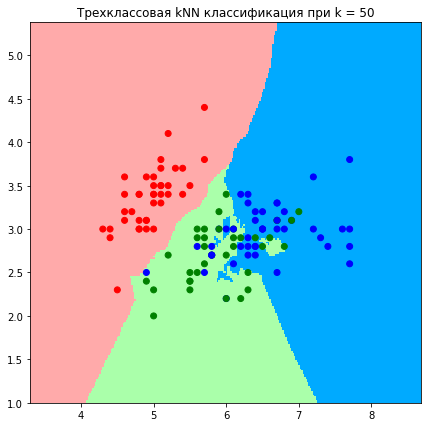

In [40]:
get_graph(X_train_knn, y_train_knn, k)

In [41]:
k = 100

y_pred = knn(X_train_knn, y_train_knn, X_test_knn, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test_knn):.3f}')

Точность алгоритма при k = 100: 0.833


<ipython-input-8-a1d024d4c536>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


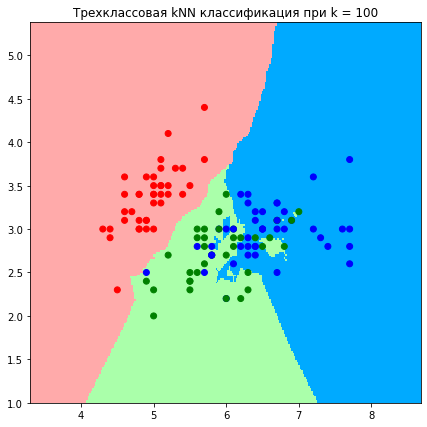

In [42]:
get_graph(X_train_knn, y_train_knn, k)

### 2. К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей в зависимости от расстояния до соседа. Сравнить метрики качества и сложность разделяющей гиперплоскости. Сделать выводы.

Перепишем функцию knn:

In [43]:
def knn(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1/(d[0] + 1)
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [44]:
k = 1

y_pred = knn(X_train_knn, y_train_knn, X_test_knn, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test_knn):.3f}')

Точность алгоритма при k = 1: 0.667


<ipython-input-8-a1d024d4c536>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


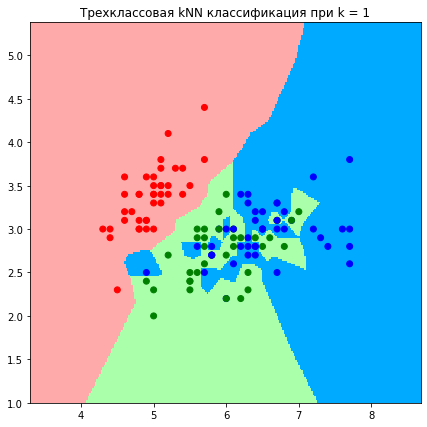

In [45]:
get_graph(X_train_knn, y_train_knn, k)

In [46]:
k = 5

y_pred = knn(X_train_knn, y_train_knn, X_test_knn, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test_knn):.3f}')

Точность алгоритма при k = 5: 0.867


<ipython-input-8-a1d024d4c536>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


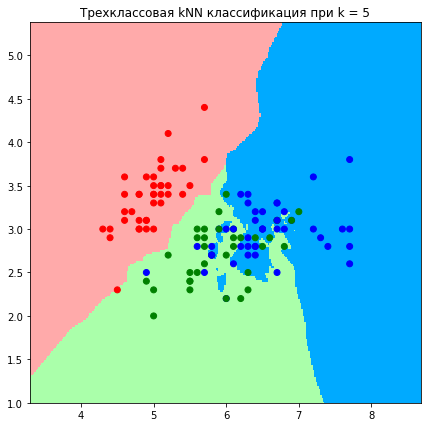

In [47]:
get_graph(X_train_knn, y_train_knn, k)

In [48]:
k = 10

y_pred = knn(X_train_knn, y_train_knn, X_test_knn, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test_knn):.3f}')

Точность алгоритма при k = 10: 0.867


<ipython-input-8-a1d024d4c536>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


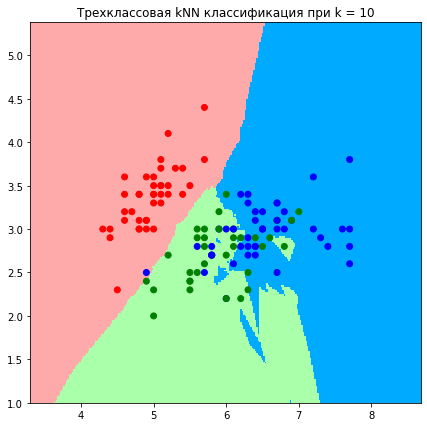

In [49]:
get_graph(X_train_knn, y_train_knn, k)

In [50]:
k = 20

y_pred = knn(X_train_knn, y_train_knn, X_test_knn, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test_knn):.3f}')

Точность алгоритма при k = 20: 0.833


<ipython-input-8-a1d024d4c536>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


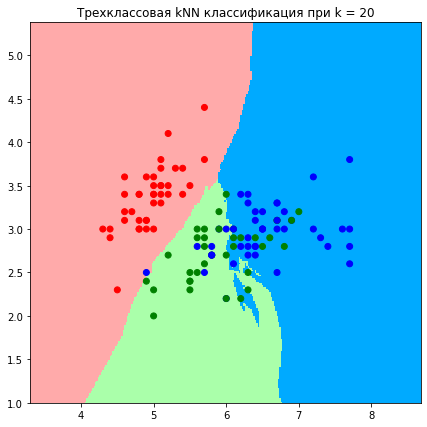

In [51]:
get_graph(X_train_knn, y_train_knn, k)

In [52]:
k = 50

y_pred = knn(X_train_knn, y_train_knn, X_test_knn, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test_knn):.3f}')

Точность алгоритма при k = 50: 0.733


<ipython-input-8-a1d024d4c536>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


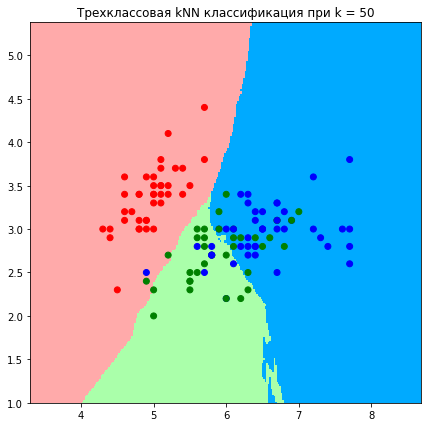

In [53]:
get_graph(X_train_knn, y_train_knn, k)

#### Выводы:

Алгоритм kNN без весов и с весами от растояния сходятся одинаково, а алгоритм с весами от номера соседа сходится хуже всего.

С увеличением количества соседей, гиперплоскости сглаживается.

Разделяющие гиперплоскости самые простые у kNN без весов и с весами от растояния, поэтому им требуется меньшее число соседей, а алгоритм с весами от номера соседа имеет самые сложные гиперплоскости, поэтому ему требуется большее число соседей.

### 3. Настроить оптимальное значение числа соседей для моделей из п.1 и п.2, сделать выводы. 

Оптимальное число соседей для kNN с весами от номера соседа = 30, с весами от растояния = 5

Алгоритм kNN с весами от номера соседа сходится медленнее и хуже. 

### 4. (опция). Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутриклассовое расстояние и построить график ее зависимости от количества кластеров k (взять от 1 до 10) для выборки данных из данного урока (создать датасет, как в методичке).

In [54]:
def metric_kmeans(centroids, clusters):
    k = len(centroids)
    n_features = len(centroids[0])
    metric = 0
    for i in range(k):
        for e in clusters[i]:
            for j in range(n_features):
                metric += np.square(centroids[i][j] - e[j])
    return metric/k

In [55]:
metric_kmeans_all = []

In [56]:
# сразу определим известное нам количество кластеров
k = 1

centroids, clusters = kmeans(X_km, k, max_iterations, min_distance)

metric_kmeans_1 = metric_kmeans(centroids, clusters)
metric_kmeans_all.append(metric_kmeans_1)
metric_kmeans_1

8933.050510522275

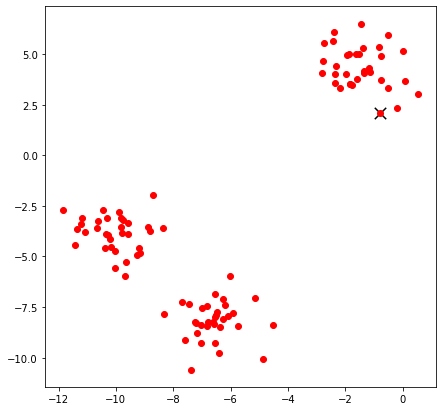

In [57]:
visualize(centroids, clusters)

In [58]:
# сразу определим известное нам количество кластеров
k = 2

centroids, clusters = kmeans(X_km, k, max_iterations, min_distance)

metric_kmeans_2 = metric_kmeans(centroids, clusters)
metric_kmeans_all.append(metric_kmeans_2)
metric_kmeans_2

494.1098529520318

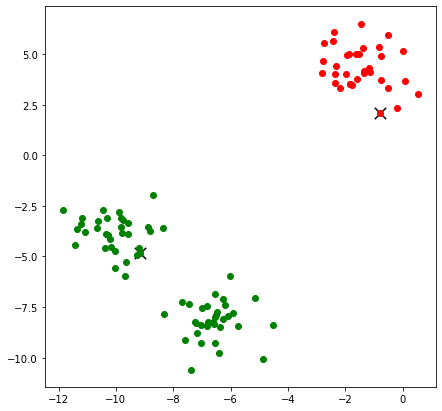

In [59]:
visualize(centroids, clusters)

In [60]:
# сразу определим известное нам количество кластеров
k = 3

centroids, clusters = kmeans(X_km, k, max_iterations, min_distance)

metric_kmeans_3 = metric_kmeans(centroids, clusters)
metric_kmeans_all.append(metric_kmeans_3)
metric_kmeans_3

314.8679003713

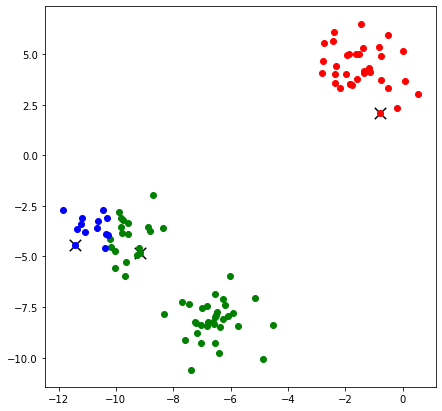

In [61]:
visualize(centroids, clusters)

In [62]:
# сразу определим известное нам количество кластеров
k = 4

centroids, clusters = kmeans(X_km, k, max_iterations, min_distance)

metric_kmeans_4 = metric_kmeans(centroids, clusters)
metric_kmeans_all.append(metric_kmeans_4)
metric_kmeans_4

227.9510475460669

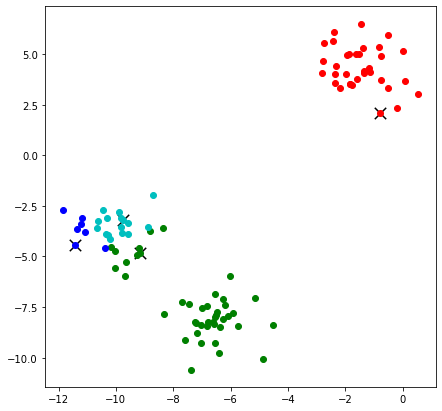

In [63]:
visualize(centroids, clusters)

In [64]:
# сразу определим известное нам количество кластеров
k = 5

centroids, clusters = kmeans(X_km, k, max_iterations, min_distance)

metric_kmeans_5 = metric_kmeans(centroids, clusters)
metric_kmeans_all.append(metric_kmeans_5)
metric_kmeans_5

90.47631239501023

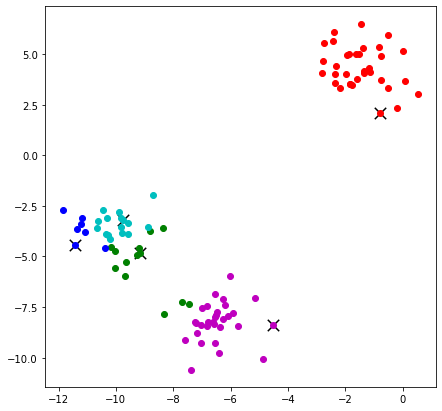

In [65]:
visualize(centroids, clusters)

In [66]:
# сразу определим известное нам количество кластеров
k = 6

centroids, clusters = kmeans(X_km, k, max_iterations, min_distance)

metric_kmeans_6 = metric_kmeans(centroids, clusters)
metric_kmeans_all.append(metric_kmeans_6)
metric_kmeans_6

53.151005438370625

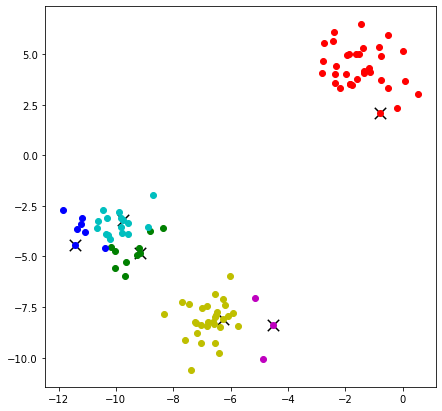

In [67]:
visualize(centroids, clusters)

In [68]:
# сразу определим известное нам количество кластеров
k = 7

centroids, clusters = kmeans(X_km, k, max_iterations, min_distance)

metric_kmeans_7 = metric_kmeans(centroids, clusters)
metric_kmeans_all.append(metric_kmeans_7)
metric_kmeans_7

44.46907717752242

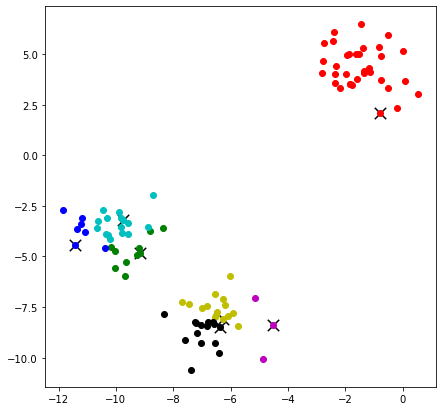

In [69]:
visualize(centroids, clusters)

In [70]:
# сразу определим известное нам количество кластеров
k = 8

centroids, clusters = kmeans(X_km, k, max_iterations, min_distance)

metric_kmeans_8 = metric_kmeans(centroids, clusters)
metric_kmeans_all.append(metric_kmeans_8)
metric_kmeans_8

38.76987072959038

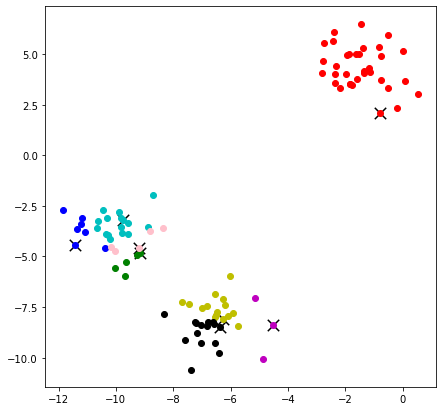

In [71]:
visualize(centroids, clusters)

In [72]:
# сразу определим известное нам количество кластеров
k = 9

centroids, clusters = kmeans(X_km, k, max_iterations, min_distance)

metric_kmeans_9 = metric_kmeans(centroids, clusters)
metric_kmeans_all.append(metric_kmeans_9)
metric_kmeans_9

17.050415427370723

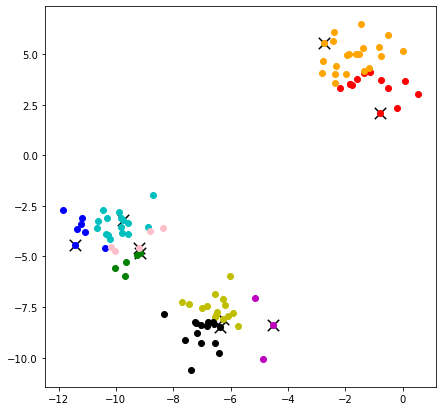

In [73]:
visualize(centroids, clusters)

In [74]:
# сразу определим известное нам количество кластеров
k = 10

centroids, clusters = kmeans(X_km, k, max_iterations, min_distance)

metric_kmeans_10 = metric_kmeans(centroids, clusters)
metric_kmeans_all.append(metric_kmeans_10)
metric_kmeans_10

10.057747265195484

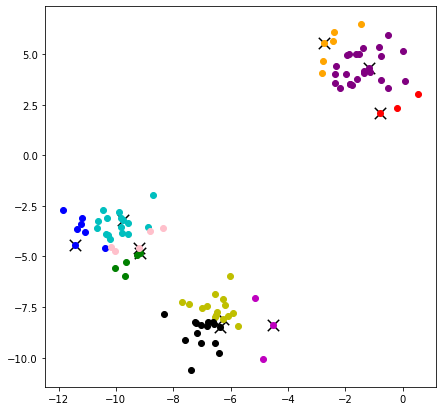

In [75]:
visualize(centroids, clusters)

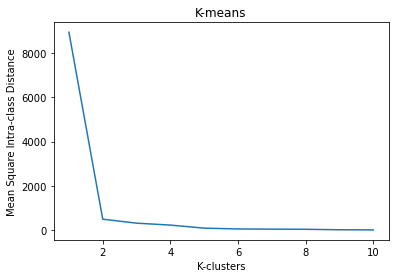

In [76]:
plt.title('K-means')
plt.xlabel('K-clusters')
plt.ylabel('Mean Square Intra-class Distance')
plt.plot(list(range(11)[1:]), metric_kmeans_all)
plt.show()

#### Вывод:

Оптимальным количеством кластеров является k = 2, так как по графику видно, что при k = 2 получается так называемый "локоть", то есть скорость уменьшения ошибки резко снижается.